<a href="https://colab.research.google.com/github/Mahe-git2hub/openlab-endsem/blob/colab/open_lab_endsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%%bash
mkdir openlab
cp /content/drive/'My Drive'/'end sem_openlab' -r /content/openlab/
ls

drive
openlab
sample_data


In [0]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from pprint import pprint

In [0]:
from pathlib import Path
import os
from bs4 import BeautifulSoup
import requests
import re
from flask import Flask, render_template, request, flash, redirect, url_for
from wordcloud import WordCloud
from werkzeug.wrappers import Request, Response
import matplotlib.pyplot as plt
from werkzeug.serving import run_simple
from google.colab.output import eval_js
import socket
import nltk
nltk.download('stopwords')

# Extracting Named Entity from an article

In [0]:
link1 = 'https://www.thehindu.com/news/national/centre-may-raise-loan-to-pay-shortfall-of-gst-compensation-amount/article31329841.ece?homepage=true'
link2 = 'https://www.thehindu.com/news/national/several-union-ministers-officials-return-to-work-at-ministries/article31329079.ece?homepage=true'
link3 = 'https://www.thehindu.com/news/national/plea-to-bring-back-to-punjab-stranded-sikh-pilgrims/article31329103.ece?homepage=true'

In [0]:
app = Flask(__name__)

print('Socket : \t',socket.gethostbyname(socket.getfqdn(socket.gethostname())))

Socket : 	 172.28.0.2


In [0]:
stopwords = ['Hindu','Subscribe Now','free trial','Subscription','Subscribe','free']
stopwords = set(stopwords).union()

In [0]:
@app.route('/url_to_string',methods=['GET'])
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return  " ".join(re.split(r'[\n\t]+', soup.get_text()))

def string_to_nlp(s:str):
    return nlp(s)

In [0]:
art = url_to_string(link2)
article = nlp(art)
len(article.ents)

210

In [0]:
len(string_to_nlp(url_to_string(link3)))

2018

In [0]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 30,
         'DATE': 46,
         'FAC': 1,
         'GPE': 20,
         'LOC': 2,
         'NORP': 16,
         'ORDINAL': 2,
         'ORG': 50,
         'PERSON': 35,
         'PRODUCT': 2,
         'QUANTITY': 5,
         'WORK_OF_ART': 1})

In [0]:
items = [x.text for x in article.ents]
Counter(items).most_common(15)

[('Hindu', 6),
 ('Monday', 5),
 ('China', 4),
 ('New Delhi', 3),
 ('April 13, 2020', 3),
 ('Rishi Kapoor', 3),
 ('5mins', 2),
 ('Bishop Anikkuzhikkattil', 2),
 ('77', 2),
 ('8mins', 2),
 ('Villupuram', 2),
 ('50   ', 2),
 ('Tarun Bajaj', 2),
 ('Economic Affairs', 2),
 ('Australian', 2)]

In [0]:
sentences = [x for x in article.sents]
#any sentence can be selected randomly
sent_num=10
print(sentences[sent_num])


3hrs Mexican protest singer Oscar Chávez dies of COVID-19 at 85   3hrs WHO should be ashamed of itself, it is like a PR agency for China, says Trump   3hrs Morning Digest:


In [0]:
displacy.render(nlp(str(sentences[sent_num])), jupyter=True, style='ent')

In [0]:
displacy.render(nlp(str(sentences[sent_num])), style='dep', jupyter = True, options = {'distance': 70})
#sentence and its dependencies

In [0]:
@app.route('/pos',methods=['GET'])
def PartsofSpeech(article,sent_num=10):
    sentences = [x for x in article.sents]
    #any sentence can be selected randomly default is 10
    svg = displacy.render(nlp(str(sentences[sent_num])), style='dep', jupyter = False, options = {'distance': 70})
    output_path = Path(os.path.join("./", "sentence.svg"))
    output_path.open('w', encoding="utf-8").write(svg)
    #sentence and its dependencies

In [0]:
@app.route('/NER',methods=['GET'])
def NER(article):
    displacy.render(article,style='ent',jupyter=False)

In [0]:
displacy.render(article, jupyter=True, style='ent')

In [0]:
doc1 = nlp("This is a sentence.")
doc2 = nlp("This is another sentence.")
html = displacy.render([doc1, doc2], style="dep", page=True)

In [0]:
pprint(html)

('<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '    <head>\n'
 '        <title>displaCy</title>\n'
 '    </head>\n'
 '\n'
 '    <body style="font-size: 16px; font-family: -apple-system, '
 "BlinkMacSystemFont, 'Segoe UI', Helvetica, Arial, sans-serif, 'Apple Color "
 "Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol'; padding: 4rem 2rem; direction: "
 'ltr">\n'
 '<figure style="margin-bottom: 6rem">\n'
 '<svg xmlns="http://www.w3.org/2000/svg" '
 'xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" '
 'id="b238302559034f59a3ff52e8b4b50231-0" class="displacy" width="750" '
 'height="312.0" direction="ltr" style="max-width: none; height: 312.0px; '
 'color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n'
 '<text class="displacy-token" fill="currentColor" text-anchor="middle" '
 'y="222.0">\n'
 '    <tspan class="displacy-word" fill="currentColor" x="50">This</tspan>\n'
 '    <tspan class="displacy-tag" dy="2em" fill="currentColor" '
 'x="50">DET</tspan>\n'
 '</text>\n'


In [0]:
html

'<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <title>displaCy</title>\n    </head>\n\n    <body style="font-size: 16px; font-family: -apple-system, BlinkMacSystemFont, \'Segoe UI\', Helvetica, Arial, sans-serif, \'Apple Color Emoji\', \'Segoe UI Emoji\', \'Segoe UI Symbol\'; padding: 4rem 2rem; direction: ltr">\n<figure style="margin-bottom: 6rem">\n<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="b238302559034f59a3ff52e8b4b50231-0" class="displacy" width="750" height="312.0" direction="ltr" style="max-width: none; height: 312.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">This</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">DET</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.

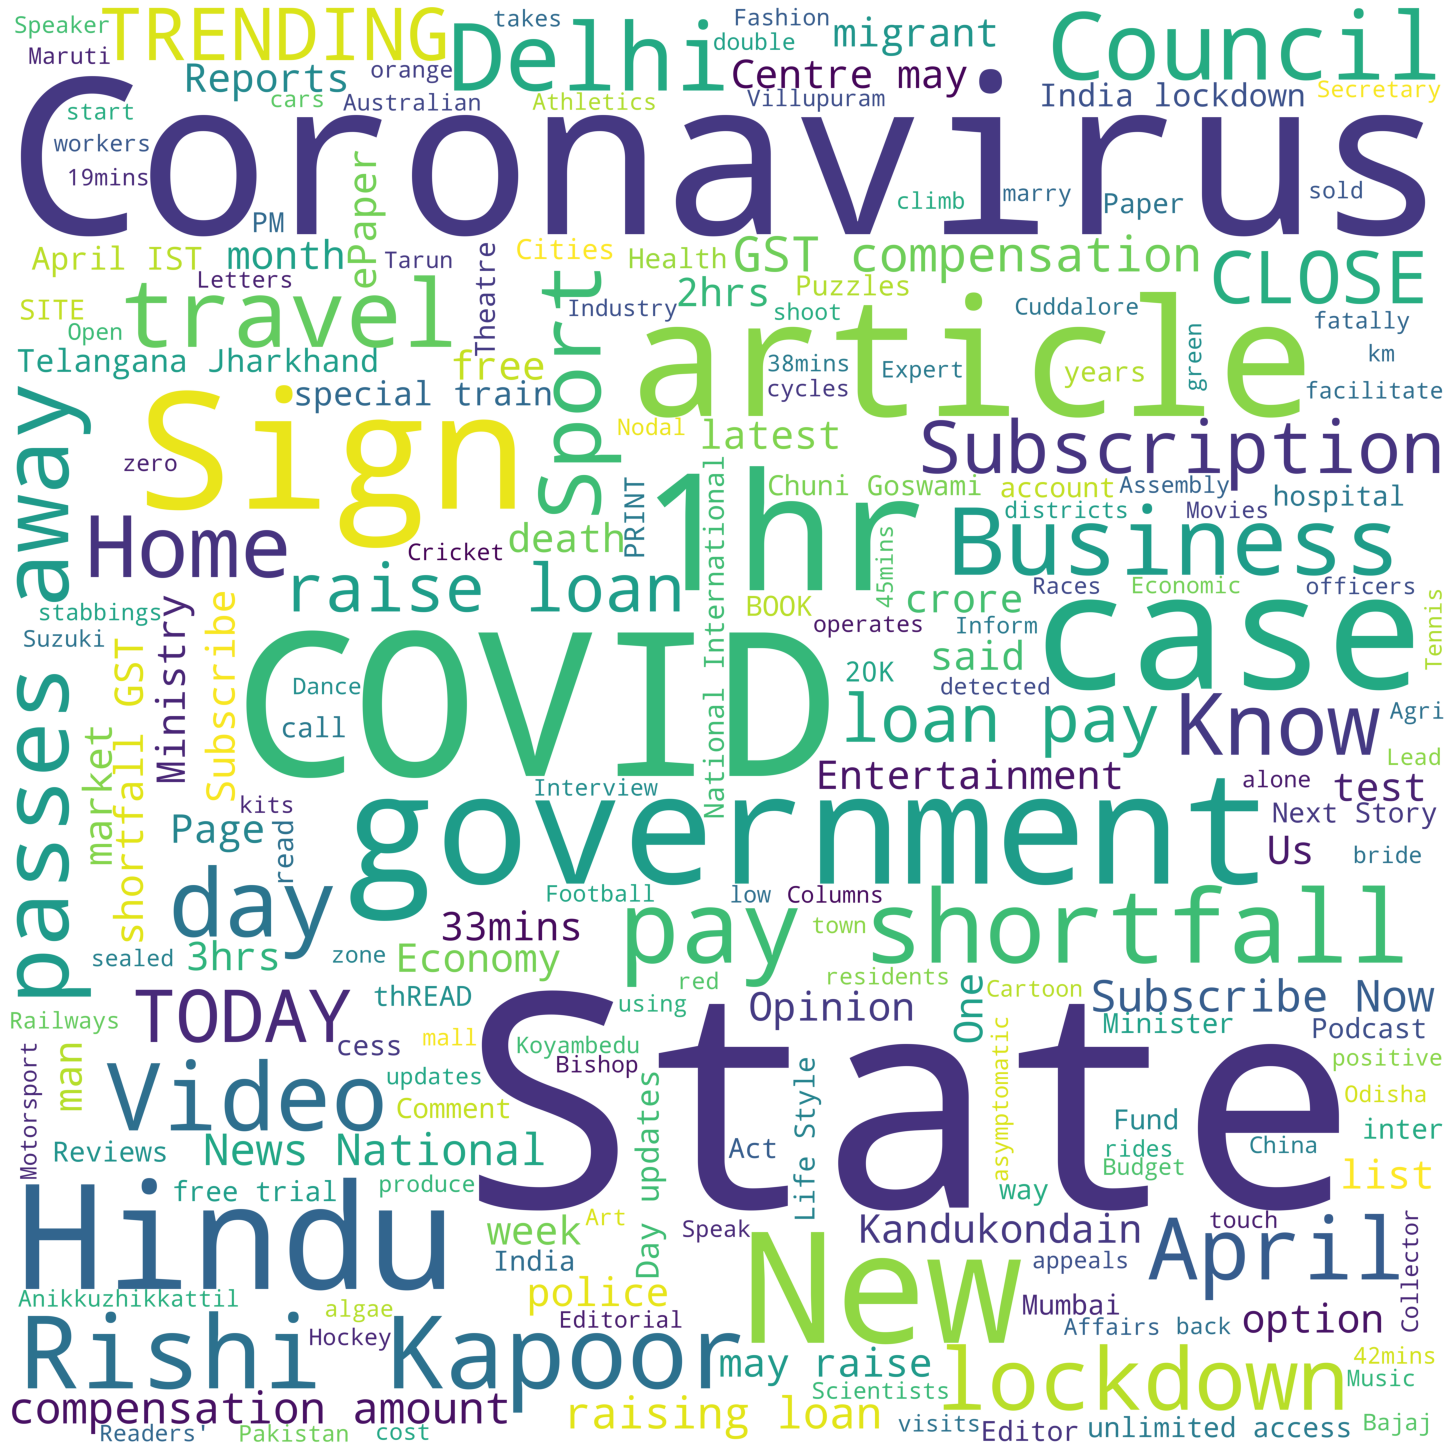

In [0]:
wordcloud = WordCloud(width=8000, height=8000,background_color='white',min_font_size=10).generate(url_to_string(link1))
plt.figure(figsize=(20, 28), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [0]:
@app.route('/wcloud')
def wc(wc_article):
    wordcloud = WordCloud(width=8000, height=8000, background_color='white', min_font_size=10).generate(wc_article)
    plt.figure(figsize=(20, 28), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('wordcloud.png', dpi='figure')
    plt.show()

In [0]:
@app.route('/', methods=['GET', 'POST'])
@app.route('/index', methods=['GET', 'POST'])
def index():
    if request.method == 'GET':
        return render_template('index.html')
    elif request.method == 'POST':
        url = request.form.get('News article URL')
        print(url)




In [0]:
if __name__ == '__main__':
    print("Use the following links if don't have any :\n", link1, '\n', link2, '\n', link3)
    app.run(debug=True)